In [14]:
# import necessary packages
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import geopandas as gpd
from descartes import PolygonPatch
from tqdm import tqdm

In [15]:
df = pd.read_csv("output/baseline-historical-table.csv",skiprows=6)

In [16]:
#remove all the columns that have the same value in all rows.
for c in df.columns:
    if len(df[c].unique()) < 2:
        df = df.drop(columns=c)

In [17]:
#remove all rows with no data, these are usually the rows at the start of a run.
l = []
for r in df.index:
    if len(df.iloc[r,4:].unique())<2:
        l.append(r)

df = df.drop(index=l)

In [46]:
df.columns

Index(['[run number]', '[step]', 'KPI-homeless', 'KPI-homeless-migrants',
       'KPI-available_buy_houses', 'KPI-available_part_rent_houses',
       'KPI-available_social_rent_houses', 'KPI-avg_income', 'KPI-avg_price',
       'KPI-avg_utility', 'KPI-citizen-count', 'KPI-p-sc-lower',
       'KPI-p-sc-working', 'KPI-p-sc-middle', 'KPI-p-sc-upper', 'KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern'],
      dtype='object')

In [20]:
#I found this code to make dict from long list.
def listToDict(lst):
    op = {lst[i]: lst[i + 1] for i in range(0, len(lst), 2)}
    return op

In [21]:
#This will take two eons of time, please don't run this code unless you really need to.
steps = []
n_steps = 241 
for index, row in tqdm(df.iloc[:n_steps,:].iterrows(), total=n_steps):
    l = []
    for column in df.columns[:4]:
        x = row[column]
        new_df = pd.DataFrame(index=np.arange(0,114), columns=[column])
        new_df[column] = x
        l.append(new_df)
    for column in df.columns[4:]:
        x = row[column].replace("[","").replace("]","").split(" ")
        d = listToDict(x)
        new_df = pd.DataFrame(index=np.arange(0, len(d)), columns=['Neighborhood number', column])
        new_df['Neighborhood number'] = [*d]
        new_df[column] = list(d.values())
        l.append(new_df)
    steps.append(pd.concat(l, axis=1))
full_df = pd.concat(steps).loc[:,~pd.concat(steps).columns.duplicated()].convert_dtypes()

100%|███████████████████████████████████████████████████████████████████████████████▋| 240/241 [00:07<00:00, 32.80it/s]


In [25]:
full_df = full_df.astype(float)

In [63]:
ethn_20 = pd.read_csv("output/ethnicity20.csv").astype(int)

In [64]:
ethn_20['c_total'] = ethn_20[ethn_20.columns[1]] + ethn_20[ethn_20.columns[2]] + ethn_20[ethn_20.columns[3]] + ethn_20[ethn_20.columns[4]] + ethn_20[ethn_20.columns[5]] + ethn_20[ethn_20.columns[6]] + ethn_20[ethn_20.columns[7]] + ethn_20[ethn_20.columns[8]] + ethn_20[ethn_20.columns[9]]

In [65]:
ethn_20['KPI-p-dutch'] = ethn_20['c_dutch'] / ethn_20['c_total']
ethn_20['KPI-p-other-western'] = ethn_20['c_other_western'] / ethn_20['c_total']
ethn_20['KPI-p-antilles'] = ethn_20['c_antilles'] / ethn_20['c_total']
ethn_20['KPI-p-morocco'] = ethn_20['c_morocco'] / ethn_20['c_total']
ethn_20['KPI-p-suriname'] = ethn_20['c_suriname'] / ethn_20['c_total']
ethn_20['KPI-p-turkey'] = ethn_20['c_turkey'] / ethn_20['c_total']
ethn_20['KPI-p-indonesian'] = ethn_20['c_indonesian'] / ethn_20['c_total']
ethn_20['KPI-p-eastern-eu'] = ethn_20['c_eastern_europe'] / ethn_20['c_total']
ethn_20['KPI-p-other-nonwestern'] = ethn_20['c_other_non_western'] / ethn_20['c_total']

In [66]:
ethn_20 = ethn_20.rename(columns={"Buurtcode":"Neighborhood number"})
ethn_20["Neighborhood number"] = ethn_20["Neighborhood number"].astype(int)

In [74]:
full_df["Neighborhood number"] = full_df["Neighborhood number"].astype(int)

In [118]:
mean_df = full_df[full_df["[step]"]==15].groupby("Neighborhood number").mean()

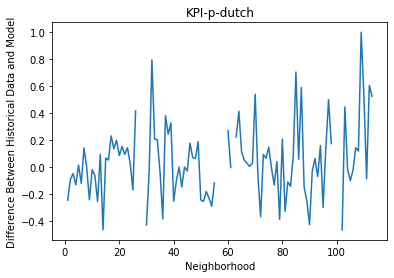

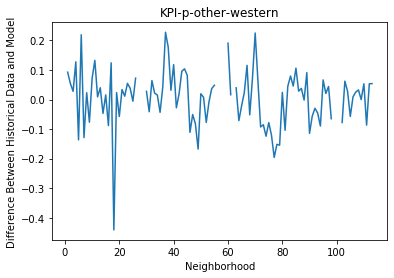

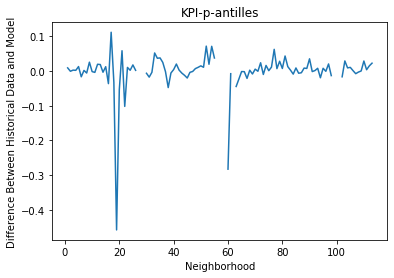

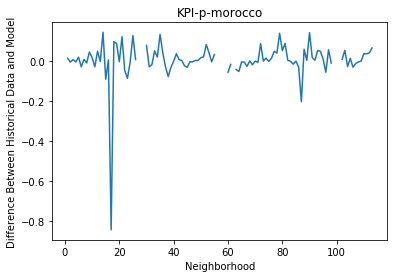

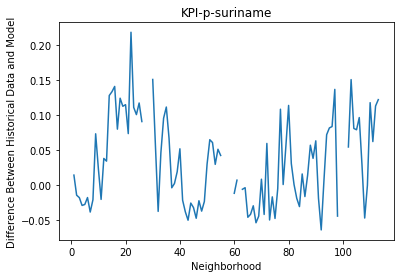

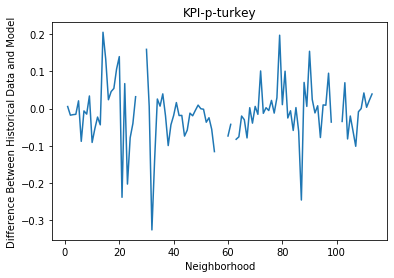

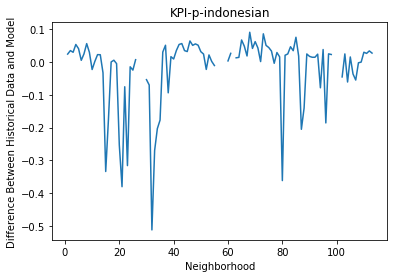

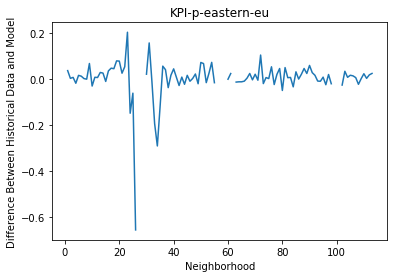

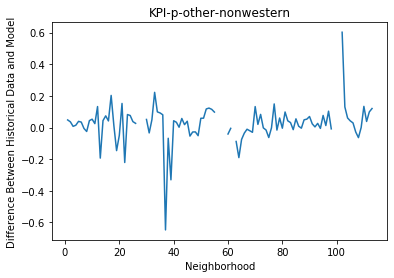

In [131]:
for KPI in ['KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']:
    plt.figure()
    plt.title(KPI)
    plt.plot(ethn_20[KPI]-mean_df[KPI])
    plt.xlabel("Neighborhood")
    plt.ylabel("Difference Between Historical Data and Model")
    plt.savefig("output/images/validation/ethnicity_diff_"+KPI+".png")
    plt.show()

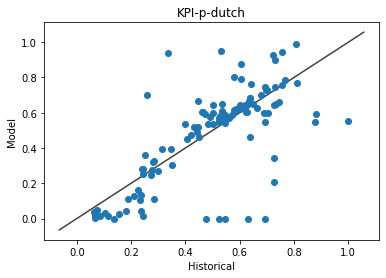

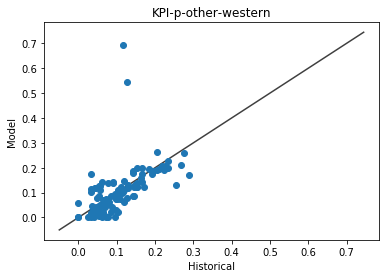

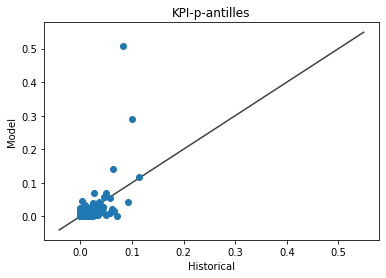

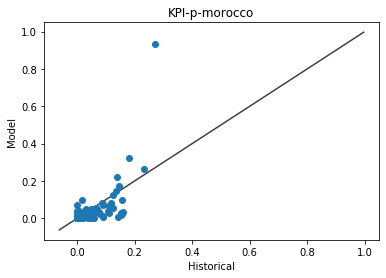

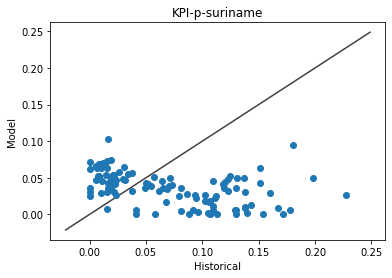

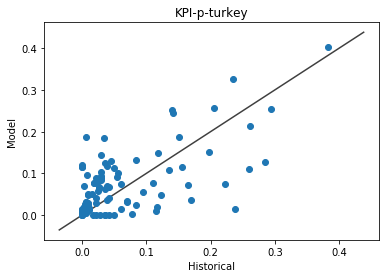

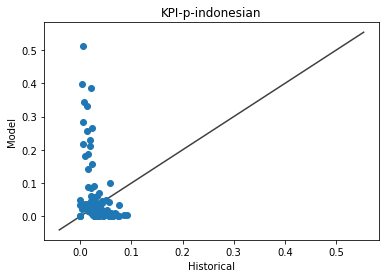

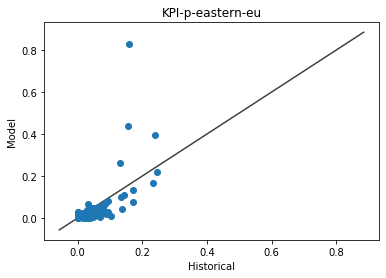

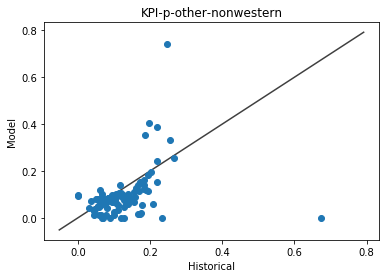

In [130]:
for KPI in ['KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']:
    fig, ax = plt.subplots()
    plt.title(KPI)
    ax.scatter(ethn_20[KPI],mean_df[KPI])
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel("Historical")
    plt.ylabel("Model")
    plt.savefig("output/images/validation/ethnicity_scatter_"+KPI+".png")
    plt.show()

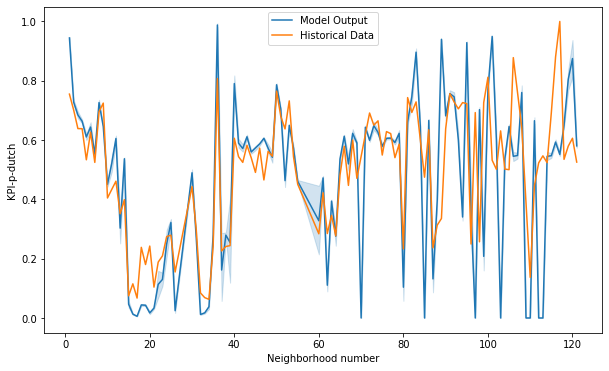

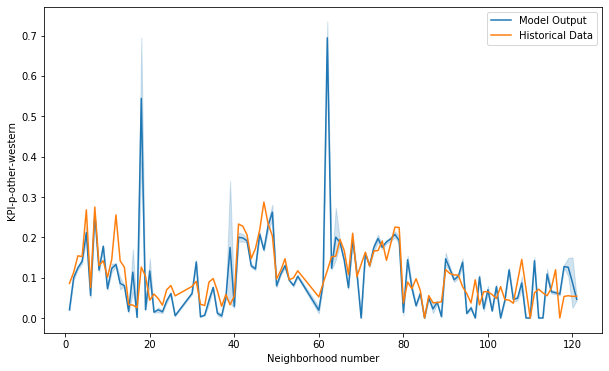

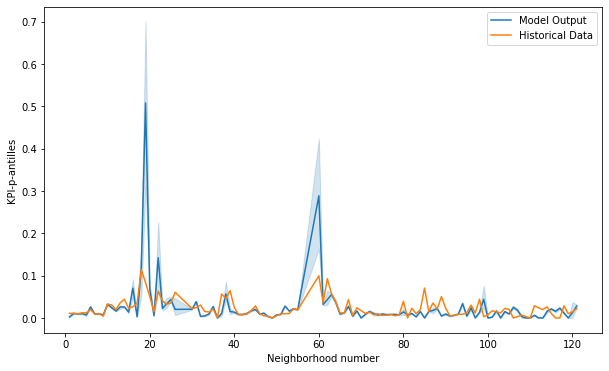

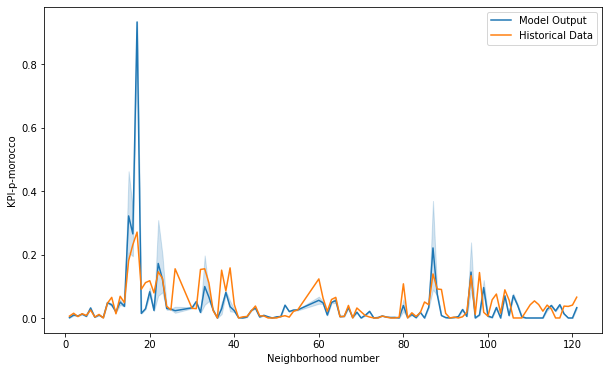

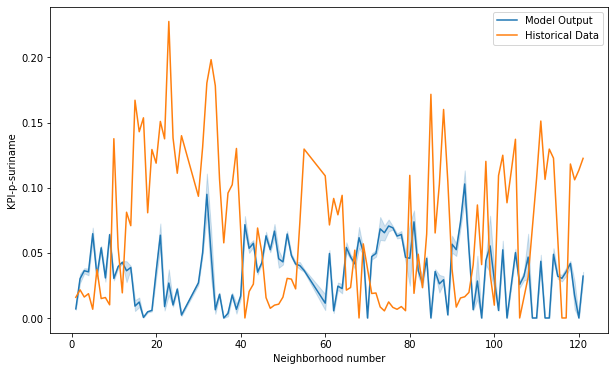

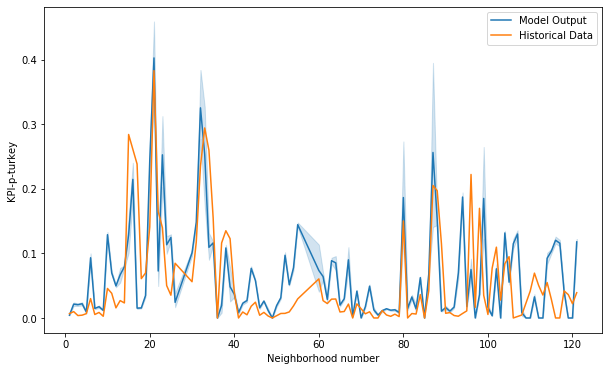

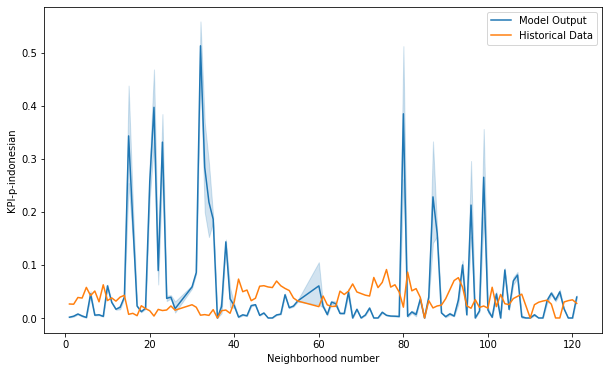

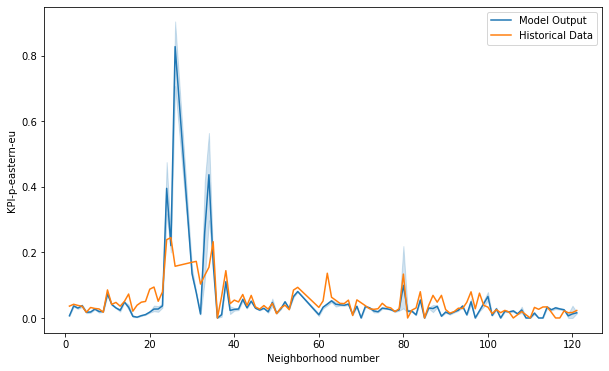

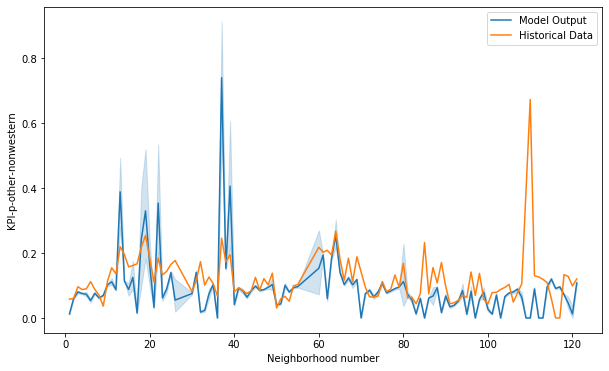

In [111]:
for KPI in ['KPI-p-dutch',
       'KPI-p-other-western', 'KPI-p-antilles', 'KPI-p-morocco',
       'KPI-p-suriname', 'KPI-p-turkey', 'KPI-p-indonesian',
       'KPI-p-eastern-eu', 'KPI-p-other-nonwestern']:
    f, ax1 = plt.subplots(figsize=(10,6))
    ax1 = sns.lineplot(x="Neighborhood number",y=KPI,data=full_df[full_df["[step]"]==15], color="tab:blue",label="Model Output")
    #ax2 = ax1.twinx()
    ax2 = sns.lineplot(x="Neighborhood number",y=KPI,data=ethn_20, color="tab:orange",label="Historical Data")
    plt.legend()
    plt.savefig("output/images/validation/ethnicity_"+KPI+".png")
    plt.show()